# Bangsgaard and Ottesen Model, 2017

In [2]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import mpld3
from scipy.interpolate import interp1d
import scipy.optimize as sco
from tabulate import tabulate
from decimal import Decimal

## Parameters and Initial Conditions

In [3]:
print(carrollControlACTH[0,1],carrollControlCortisol[0,1])

NameError: name 'carrollControlACTH' is not defined

In [4]:
# initial conditions, based on control patient (f) concentrations at midnight
#    had to guess for CRH level, though

y0 = [10,14.47489,1.903323]

In [5]:
# insensitive parameters, kept fixed between subjects

a_2 = 1.7809e9
a_3 = 2.2803e4
a_4 = 1.7745e5
mu = 5.83e2
T = Decimal(1440)
N_c = Decimal(0.5217)
k = Decimal(5)
l = Decimal(6)
alpha = Decimal(300)
beta = Decimal(950)
eps = Decimal(0.01)

In [6]:
# parameters for control subject (f), listed in Table A1 and Table A2

a_0 = 3.9031e-4
a_1 = 6.839e12
a_5 = 4.617e-4
w_1 = 0.0337
w_2 = 0.0205
w_3 = 0.0238
delta = 83.8

authors_params = [a_0, a_1, a_5, w_1, w_2, w_3, delta]

In [7]:
# parameters for control subjects
a_0 = 4.71e-2
a_1 = 6.84e12
a_2 = 1.78e9
mu = 583
a_3 = 2.28e4
a_4 = 1.77e5
a_5 = 3.81e-4
w_1 = 4.49e-2 # 0.0449
w_2 = 2.25e-2 # 0.0225
w_3 = 2.01e-2 # 0.0201
delta = 8.61e2 # 861
alpha = Decimal(300)
k = Decimal(5)
beta = Decimal(950)
l = Decimal(6)
eps = Decimal(0.01)
N_c = Decimal(0.5217)
T = Decimal(1440)

authors_params = [a_0, a_1, a_5, w_1, w_2, w_3, delta]

In [8]:
# parameters for hypercortisolemic patients
a_0 = 1.31e-1
a_1 = 1.29e13
a_2 = 1.78e9
mu = 583
a_3 = 2.28e4
a_4 = 1.77e5
a_5 = 3.03e-4
w_1 = 4.57e-2
w_2 = 1.46e-2
w_3 = 2.10e-2
delta = 2.01e1
alpha = Decimal(300)
k = Decimal(5)
beta = Decimal(950)
l = Decimal(6)
eps = Decimal(0.01)
N_c = Decimal(0.5217)
T = Decimal(1440)

authors_params = [a_0, a_1, a_5, w_1, w_2, w_3, delta]

In [9]:
par = delta
plus_minus = 1.79e1
print(par - plus_minus, par + plus_minus)

2.200000000000003 38.0


In [10]:
# bounds for control subjects (based on Table 1 with 25% used for parameters with no published range)
# order is: a_0, a_1, a_2, mu, a_3, a_4, a_5, w_1, w_2, w_3, delta, alpha, k, beta, l, eps, N_c
#bounds = [(-0.0018, 0.096), (6833110000000.0, 6846890000000.0), (1335000000.0, 2225000000.0), (437.25, 728.75), (17100.0, 28500.0), (132750.0, 221250.0), (0.000142, 0.00062), (0.0327, 0.0571), (0.0078, 0.0372), (0.009, 0.0312), (170., 1552.), (225., 375.), (3.75, 6.25), (712.5, 1187.5), (4.5, 7.5), (0.0075, 0.0125), (0.391275, 0.652125)]

In [11]:
# bounds for control based on Table 1 but with only parameters that are supposed to vary between subjects
# order is: a_0, a_1, a_5, w_1, w_2, w_3, delta
bounds = [(-0.0018, 0.096), (6833110000000.0, 6846890000000.0), (0.000142, 0.00062), (0.0327, 0.0571), (0.0078, 0.0372), (0.009, 0.0312), (170., 1552.)]

In [12]:
# bounds for hypercortisolemic subjects (based on Table 1 with 25% used for parameters with no published range)
# order is: a_0, a_1, a_2, mu, a_3, a_4, a_5, w_1, w_2, w_3, delta, alpha, k, beta, l, eps, N_c
#bounds = [(0.0485, 0.2135), (11350000000000.0, 14450000000000.0), (1335000000.0, 2225000000.0), (437.25, 728.75), (17100.0, 28500.0), (132750.0, 221250.0), (0.000156, 0.00045), (0.0332, 0.0582), (0.00978, 0.01942), (0.01511, 0.02689), (2.2, 38.), (225., 375.), (3.75, 6.25), (712.5, 1187.5), (4.5, 7.5), (0.0075, 0.0125), (0.391275, 0.652125)]

In [13]:
# bounds for hypercortisolemic based on Table 1 but with only parameters that are supposed to vary between subjects
# order is: a_0, a_1, a_5, w_1, w_2, w_3, delta
#bounds = [(0.0485, 0.2135), (11350000000000.0, 14450000000000.0), (0.000156, 0.00045), (0.0332, 0.0582), (0.00978, 0.01942), (0.01511, 0.02689), (2.2, 38.)]

In [14]:
# bounds for the parameters to be used in optimization, see above block of parameters for control subject (f) for 
#     the order of parameters in this array
#bounds = ([0., 0.02], [6.5e12, 7e12], [0.0001, 0.00075], [0.03, 0.06], [0.007, 0.04], [0.008, 0.035], [50., 2000.])


In [15]:
# expanded bounds, to see if that helps fitting at all
bounds = ([0., 0.1], [6.5e12, 7e12], [0., 0.05], [0., 0.6], [0., 0.4], [0., 0.35], [10., 5000.])

In [16]:
# expanded bounds, and every parameter, except T, optimized (order of added params: a_2, a_3, a_4, mu, N_c, k, l, alpha, beta, eps)
#bounds = ([0., 0.1], [6.5e12, 7e12], [0., 0.05], [0., 0.6], [0., 0.4], [0., 0.35], [10., 5000.], [1e8, 1e10], [1e3, 1e5], [1e4, 1e6], [1., 1e3], [0., 2.], [4, 6], [5, 7], [50., 1000.], [500., 2000.], [0., 1.])

In [18]:
# length of time over which we wish to integrate
#t_start = -0.01
#t_end = 1440.01
#t_step = 0.01

In [17]:
# length of time over which we wish to integrate for matching Dr Nelson's data
# time interval and step definition, for using scipy.integrate.ode
t_start = -0.01
t_end = 140.01
t_step = 0.01

## Put extracted data from control patient F (Bangsgaard & Ottesen, 2017) into arrays and smooth over neighboring 5 points

In [19]:
# generate arrays for the cortisol and ACTH data from control patient F in the Bangsgaard & Ottesen paper
patientFcortisol = np.genfromtxt("Bangsgaard-Ottesen-2017-patient-f-cortisol-data.txt")
patientFacth = np.genfromtxt("Bangsgaard-Ottesen-2017-patient-f-ACTH-data.txt")

In [20]:
# this function computes the moving average over the neighboring 5 points
def smoothing(a, n=5) :
    idx = int((n-1)/2)
    ret = np.cumsum(a, dtype=float)
    ret[idx+1:-idx] = ret[n:] - ret[:-n]
    ret[idx] = ret[idx+2]
    return ret[idx:-idx] / n

In [21]:
# create arrays for the smoothed data
patientFcortisol_smooth = patientFcortisol
patientFacth_smooth = patientFacth

# run the smoothing function on the raw data
# REMEMBER: need to re-extract the data from the files into the non-smooth arrays to make them non-smooth.
#     I'm still not sure why it's smoothing the original data when I only save the values from the smoothing function
#     into the smooth arrays
patientFcortisol_smooth[2:-2,1] = smoothing(patientFcortisol[:,1])
patientFacth_smooth[2:-2,1] = smoothing(patientFacth[:,1])

In [22]:
# convert the time scale to minutes so that it agrees with the ODEs

for i in range(len(patientFcortisol_smooth[:,0])):
    patientFcortisol_smooth[i,0] = patientFcortisol[i,0]*60
for i in range(len(patientFacth_smooth[:,0])):
    patientFacth_smooth[i,0] = patientFacth[i,0]*60

[Text(0, 0.5, 'ACTH (pg/mL)'), Text(0.5, 0, 'Time (hours)')]

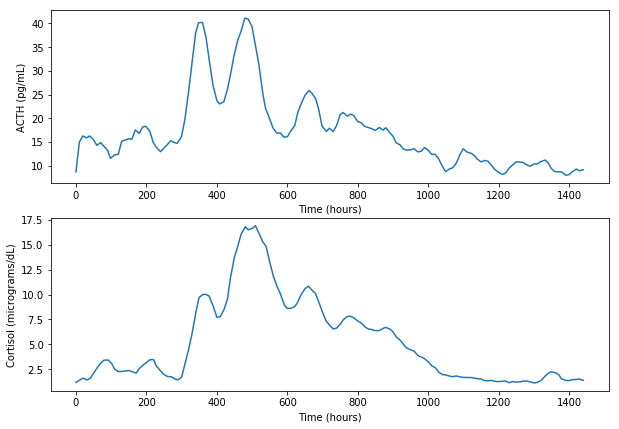

In [23]:
# plot the smoothed data to check it against the figures in the paper
#mpld3.enable_notebook()
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(10,7))
ax2.plot(patientFcortisol[:,0], patientFcortisol_smooth[:,1], '-')
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax1.plot(patientFacth[:,0], patientFacth_smooth[:,1], '-')
ax1.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")

## Put Raw Data Into Arrays

In [24]:
yehudaControlCortisol = np.genfromtxt("yehuda-control-cortisol.txt")
yehudaPTSDCortisol = np.genfromtxt("yehuda-PTSD-cortisol.txt")
yehudaDepressedCortisol = np.genfromtxt("yehuda-depressed-cortisol.txt")

In [25]:
# extract the data from text files into 145x2 arrays
carrollControlCortisol = np.genfromtxt("controlGroupCortisolCarroll.txt", dtype = float)
carrollHCDepressedCortisol = np.genfromtxt("HCDepressedCortisolCarroll.txt", dtype = float)
carrollLCDepressedCortisol = np.genfromtxt("LCDepressedCortisolCarroll.txt", dtype = float)

carrollControlACTH = np.genfromtxt("controlGroupACTHCarroll.txt", dtype = float)
carrollHCDepressedACTH = np.genfromtxt("HCDepressedACTHCarroll.txt", dtype = float)
carrollLCDepressedACTH = np.genfromtxt("LCDepressedACTHCarroll.txt", dtype = float)

In [26]:
# rearrange Carroll data, so that we can start optimizing at midnight and go until 10AM 34 hours later
carrollControlCortisol_rearr = np.vstack((carrollControlCortisol[60:,:], carrollControlCortisol[0:60,:]))
carrollHCDepressedCortisol_rearr = np.vstack((carrollHCDepressedCortisol[60:,:], carrollHCDepressedCortisol[0:60,:]))
carrollLCDepressedCortisol_rearr = np.vstack((carrollLCDepressedCortisol[60:,:], carrollLCDepressedCortisol[0:60,:]))

carrollControlACTH_rearr = np.vstack((carrollControlACTH[60:,:], carrollControlACTH[0:60,:]))
carrollHCDepressedACTH_rearr = np.vstack((carrollHCDepressedACTH[60:,:], carrollHCDepressedACTH[0:60,:]))
carrollLCDepressedACTH_rearr = np.vstack((carrollLCDepressedACTH[60:,:], carrollLCDepressedACTH[0:60,:]))

In [27]:
golierPTSDCortisol = np.genfromtxt("golier-PTSD-cortisol.txt", dtype = float)
golierNonPTSDTraumaExposedCortisol = np.genfromtxt("golier-non-PTSD-trauma-exposed-cortisol.txt", dtype = float)
golierNonPTSDNonExposedCortisol = np.genfromtxt("golier-non-exposed-control-cortisol.txt", dtype = float)

golierPTSDACTH = np.genfromtxt("golier-PTSD-ACTH.txt", dtype = float)
golierNonPTSDTraumaExposedACTH = np.genfromtxt("golier-non-PTSD-trauma-exposed-ACTH.txt", dtype = float)
golierNonPTSDNonExposedACTH = np.genfromtxt("golier-non-exposed-control-ACTH.txt", dtype = float)

In [28]:
golierPTSDCortisol_rearr = np.vstack((golierPTSDCortisol[7:,:], golierPTSDCortisol[0:7,:]))
golierNonPTSDTraumaExposedCortisol_rearr = np.vstack((golierNonPTSDTraumaExposedCortisol[7:,:], golierNonPTSDTraumaExposedCortisol[0:7,:]))
golierNonPTSDNonExposedCortisol_rearr = np.vstack((golierNonPTSDNonExposedCortisol[7:,:], golierNonPTSDNonExposedCortisol[0:7,:]))

golierPTSDACTH_rearr = np.vstack((golierPTSDACTH[3:,:], golierPTSDACTH[0:3,:]))
golierNonPTSDTraumaExposedACTH_rearr = np.vstack((golierNonPTSDTraumaExposedACTH[3:,:], golierNonPTSDTraumaExposedACTH[0:3,:]))
golierNonPTSDNonExposedACTH_rearr = np.vstack((golierNonPTSDNonExposedACTH[3:,:], golierNonPTSDNonExposedACTH[0:3,:]))

In [29]:
bremnerAbusedPTSDCortisol = np.genfromtxt("bremner-abused-PTSD-cortisol.txt", dtype = float)
bremnerNonAbusedPTSDCortisol = np.genfromtxt("bremner-non-abused-PTSD-cortisol.txt", dtype = float)
bremnerNonAbusedNonPTSDCortisol = np.genfromtxt("bremner-non-abused-non-PTSD-cortisol.txt", dtype = float)

In [30]:
bremnerAbusedPTSDCortisol_rearr = np.vstack((bremnerAbusedPTSDCortisol[68:,:],bremnerAbusedPTSDCortisol[0:68,:]))
bremnerNonAbusedPTSDCortisol_rearr = np.vstack((bremnerNonAbusedPTSDCortisol[68:,:],bremnerNonAbusedPTSDCortisol[0:68,:]))
bremnerNonAbusedNonPTSDCortisol_rearr = np.vstack((bremnerNonAbusedNonPTSDCortisol[68:,:],bremnerNonAbusedNonPTSDCortisol[0:68,:]))

In [31]:
# data from Dr Erik Nelson
nelsonACTH_data = np.genfromtxt("tsst_acth_nelson.txt")
nelsonCortisol_data = np.genfromtxt("tsst_cort_nelson.txt")

### Smooth Data, If Desired

In [32]:
# this function computes the moving average over the neighboring 5 points
def smoothing(a, n=5) :
    idx = int((n-1)/2)
    ret = np.cumsum(a, dtype=float)
    ret[idx+1:-idx] = ret[n:] - ret[:-n]
    ret[idx] = ret[idx+2]
    return ret[idx:-idx] / n

In [33]:
yehudaControlCortisol_smooth = yehudaControlCortisol
yehudaPTSDCortisol_smooth = yehudaPTSDCortisol
yehudaDepressedCortisol_smooth = yehudaDepressedCortisol

yehudaControlCortisol_smooth[2:-2,1] = smoothing(yehudaControlCortisol[:,1])
yehudaPTSDCortisol_smooth[2:-2,1] = smoothing(yehudaPTSDCortisol[:,1])
yehudaDepressedCortisol_smooth[2:-2,1] = smoothing(yehudaDepressedCortisol[:,1])

In [34]:
# run smoothing if so desired
# REMEMBER: need to re-extract the data from the files into the non-smooth arrays to make them non-smooth.
#     I'm still not sure why it's smoothing the original data when I only save the values from the smoothing function
#     into the smooth arrays
carrollControlCortisol_smooth = carrollControlCortisol
carrollHCDepressedCortisol_smooth = carrollHCDepressedCortisol
carrollLCDepressedCortisol_smooth = carrollLCDepressedCortisol

carrollControlACTH_smooth = carrollControlACTH
carrollHCDepressedACTH_smooth = carrollHCDepressedACTH
carrollLCDepressedACTH_smooth = carrollLCDepressedACTH

carrollControlCortisol_rearr_smooth = carrollControlCortisol_rearr
carrollHCDepressedCortisol_rearr_smooth = carrollHCDepressedCortisol_rearr
carrollLCDepressedCortisol_rearr_smooth = carrollLCDepressedCortisol_rearr

carrollControlACTH_rearr_smooth = carrollControlACTH_rearr
carrollHCDepressedACTH_rearr_smooth = carrollHCDepressedACTH_rearr
carrollLCDepressedACTH_rearr_smooth = carrollLCDepressedACTH_rearr

carrollControlCortisol_smooth[2:-2,1] = smoothing(carrollControlCortisol[:,1])
carrollHCDepressedCortisol_smooth[2:-2,1] = smoothing(carrollHCDepressedCortisol[:,1])
carrollLCDepressedCortisol_smooth[2:-2,1] = smoothing(carrollLCDepressedCortisol[:,1])

carrollControlACTH_smooth[2:-2,1] = smoothing(carrollControlACTH[:,1])
carrollHCDepressedACTH_smooth[2:-2,1] = smoothing(carrollHCDepressedACTH[:,1])
carrollLCDepressedACTH_smooth[2:-2,1] = smoothing(carrollLCDepressedACTH[:,1])

carrollControlCortisol_rearr_smooth[2:-2,1] = smoothing(carrollControlCortisol_rearr[:,1])
carrollHCDepressedCortisol_rearr_smooth[2:-2,1] = smoothing(carrollHCDepressedCortisol_rearr[:,1])
carrollLCDepressedCortisol_rearr_smooth[2:-2,1] = smoothing(carrollLCDepressedCortisol_rearr[:,1])

carrollControlACTH_rearr_smooth[2:-2,1] = smoothing(carrollControlACTH_rearr[:,1])
carrollHCDepressedACTH_rearr_smooth[2:-2,1] = smoothing(carrollHCDepressedACTH_rearr[:,1])
carrollLCDepressedACTH_rearr_smooth[2:-2,1] = smoothing(carrollLCDepressedACTH_rearr[:,1])

In [35]:
golierPTSDCortisol_smooth = golierPTSDCortisol
golierNonPTSDTraumaExposedCortisol_smooth = golierNonPTSDTraumaExposedCortisol
golierNonPTSDNonExposedCortisol_smooth = golierNonPTSDNonExposedCortisol
golierPTSDACTH_smooth = golierPTSDACTH
golierNonPTSDTraumaExposedACTH_smooth = golierNonPTSDTraumaExposedACTH
golierNonPTSDNonExposedACTH_smooth = golierNonPTSDNonExposedACTH

golierPTSDCortisol_smooth[2:-2,1] = smoothing(golierPTSDCortisol[:,1])
golierNonPTSDTraumaExposedCortisol_smooth[2:-2,1] = smoothing(golierNonPTSDTraumaExposedCortisol[:,1])
golierNonPTSDNonExposedCortisol_smooth[2:-2,1] = smoothing(golierNonPTSDNonExposedCortisol[:,1])

golierPTSDACTH_smooth[2:-2,1] = smoothing(golierPTSDACTH[:,1])
golierNonPTSDTraumaExposedACTH_smooth[2:-2,1] = smoothing(golierNonPTSDTraumaExposedACTH[:,1])
golierNonPTSDNonExposedACTH_smooth[2:-2,1] = smoothing(golierNonPTSDNonExposedACTH[:,1])

In [36]:
golierPTSDCortisol_rearr_smooth = golierPTSDCortisol_rearr
golierNonPTSDTraumaExposedCortisol_rearr_smooth = golierNonPTSDTraumaExposedCortisol_rearr
golierNonPTSDNonExposedCortisol_rearr_smooth = golierNonPTSDNonExposedCortisol_rearr
golierPTSDACTH_rearr_smooth = golierPTSDACTH_rearr
golierNonPTSDTraumaExposedACTH_rearr_smooth = golierNonPTSDTraumaExposedACTH_rearr
golierNonPTSDNonExposedACTH_rearr_smooth = golierNonPTSDNonExposedACTH_rearr

golierPTSDCortisol_rearr_smooth[2:-2,1] = smoothing(golierPTSDCortisol_rearr[:,1])
golierNonPTSDTraumaExposedCortisol_rearr_smooth[2:-2,1] = smoothing(golierNonPTSDTraumaExposedCortisol_rearr[:,1])
golierNonPTSDNonExposedCortisol_rearr_smooth[2:-2,1] = smoothing(golierNonPTSDNonExposedCortisol_rearr[:,1])

golierPTSDACTH_rearr_smooth[2:-2,1] = smoothing(golierPTSDACTH_rearr[:,1])
golierNonPTSDTraumaExposedACTH_rearr_smooth[2:-2,1] = smoothing(golierNonPTSDTraumaExposedACTH_rearr[:,1])
golierNonPTSDNonExposedACTH_rearr_smooth[2:-2,1] = smoothing(golierNonPTSDNonExposedACTH_rearr[:,1])

In [37]:
bremnerAbusedPTSDCortisol_rearr_smooth = bremnerAbusedPTSDCortisol_rearr
bremnerNonAbusedPTSDCortisol_rearr_smooth = bremnerNonAbusedPTSDCortisol_rearr
bremnerNonAbusedNonPTSDCortisol_rearr_smooth = bremnerNonAbusedNonPTSDCortisol_rearr

bremnerAbusedPTSDCortisol_rearr_smooth[2:-2,1] = smoothing(bremnerAbusedPTSDCortisol_rearr[:,1])
bremnerNonAbusedPTSDCortisol_rearr_smooth[2:-2,1] = smoothing(bremnerNonAbusedPTSDCortisol_rearr[:,1])
bremnerNonAbusedNonPTSDCortisol_rearr_smooth[2:-2,1] = smoothing(bremnerNonAbusedNonPTSDCortisol_rearr[:,1])

In [38]:
bremnerAbusedPTSDCortisol_smooth = bremnerAbusedPTSDCortisol
bremnerNonAbusedPTSDCortisol_smooth = bremnerNonAbusedPTSDCortisol
bremnerNonAbusedNonPTSDCortisol_smooth = bremnerNonAbusedNonPTSDCortisol

bremnerAbusedPTSDCortisol_smooth[2:-2,1] = smoothing(bremnerAbusedPTSDCortisol[:,1])
bremnerNonAbusedPTSDCortisol_smooth[2:-2,1] = smoothing(bremnerNonAbusedPTSDCortisol[:,1])
bremnerNonAbusedNonPTSDCortisol_smooth[2:-2,1] = smoothing(bremnerNonAbusedNonPTSDCortisol[:,1])

### Re-run Code to Input Non-Smoothed Data into Array

In [39]:
yehudaControlCortisol = np.genfromtxt("yehuda-control-cortisol.txt")
yehudaPTSDCortisol = np.genfromtxt("yehuda-PTSD-cortisol.txt")
yehudaDepressedCortisol = np.genfromtxt("yehuda-depressed-cortisol.txt")

In [40]:
# extract the data from text files into 145x2 arrays
carrollControlCortisol = np.genfromtxt("controlGroupCortisolCarroll.txt", dtype = float)
carrollHCDepressedCortisol = np.genfromtxt("HCDepressedCortisolCarroll.txt", dtype = float)
carrollLCDepressedCortisol = np.genfromtxt("LCDepressedCortisolCarroll.txt", dtype = float)

carrollControlACTH = np.genfromtxt("controlGroupACTHCarroll.txt", dtype = float)
carrollHCDepressedACTH = np.genfromtxt("HCDepressedACTHCarroll.txt", dtype = float)
carrollLCDepressedACTH = np.genfromtxt("LCDepressedACTHCarroll.txt", dtype = float)

In [41]:
# rearrange Carroll data, so that we can start optimizing at midnight and go until 10AM 34 hours later
carrollControlCortisol_rearr = np.vstack((carrollControlCortisol[60:,:], carrollControlCortisol[0:60,:]))
carrollHCDepressedCortisol_rearr = np.vstack((carrollHCDepressedCortisol[60:,:], carrollHCDepressedCortisol[0:60,:]))
carrollLCDepressedCortisol_rearr = np.vstack((carrollLCDepressedCortisol[60:,:], carrollLCDepressedCortisol[0:60,:]))

carrollControlACTH_rearr = np.vstack((carrollControlACTH[60:,:], carrollControlACTH[0:60,:]))
carrollHCDepressedACTH_rearr = np.vstack((carrollHCDepressedACTH[60:,:], carrollHCDepressedACTH[0:60,:]))
carrollLCDepressedACTH_rearr = np.vstack((carrollLCDepressedACTH[60:,:], carrollLCDepressedACTH[0:60,:]))

In [42]:
golierPTSDCortisol = np.genfromtxt("golier-PTSD-cortisol.txt", dtype = float)
golierNonPTSDTraumaExposedCortisol = np.genfromtxt("golier-non-PTSD-trauma-exposed-cortisol.txt", dtype = float)
golierNonPTSDNonExposedCortisol = np.genfromtxt("golier-non-exposed-control-cortisol.txt", dtype = float)

golierPTSDACTH = np.genfromtxt("golier-PTSD-ACTH.txt", dtype = float)
golierNonPTSDTraumaExposedACTH = np.genfromtxt("golier-non-PTSD-trauma-exposed-ACTH.txt", dtype = float)
golierNonPTSDNonExposedACTH = np.genfromtxt("golier-non-exposed-control-ACTH.txt", dtype = float)

In [43]:
golierPTSDCortisol_rearr = np.vstack((golierPTSDCortisol[7:,:], golierPTSDCortisol[0:7,:]))
golierNonPTSDTraumaExposedCortisol_rearr = np.vstack((golierNonPTSDTraumaExposedCortisol[7:,:], golierNonPTSDTraumaExposedCortisol[0:7,:]))
golierNonPTSDNonExposedCortisol_rearr = np.vstack((golierNonPTSDNonExposedCortisol[7:,:], golierNonPTSDNonExposedCortisol[0:7,:]))

golierPTSDACTH_rearr = np.vstack((golierPTSDACTH[3:,:], golierPTSDACTH[0:3,:]))
golierNonPTSDTraumaExposedACTH_rearr = np.vstack((golierNonPTSDTraumaExposedACTH[3:,:], golierNonPTSDTraumaExposedACTH[0:3,:]))
golierNonPTSDNonExposedACTH_rearr = np.vstack((golierNonPTSDNonExposedACTH[3:,:], golierNonPTSDNonExposedACTH[0:3,:]))

In [44]:
bremnerAbusedPTSDCortisol = np.genfromtxt("bremner-abused-PTSD-cortisol.txt", dtype = float)
bremnerNonAbusedPTSDCortisol = np.genfromtxt("bremner-non-abused-PTSD-cortisol.txt", dtype = float)
bremnerNonAbusedNonPTSDCortisol = np.genfromtxt("bremner-non-abused-non-PTSD-cortisol.txt", dtype = float)

In [45]:
bremnerAbusedPTSDCortisol_rearr = np.vstack((bremnerAbusedPTSDCortisol[68:,:],bremnerAbusedPTSDCortisol[0:68,:]))
bremnerNonAbusedPTSDCortisol_rearr = np.vstack((bremnerNonAbusedPTSDCortisol[68:,:],bremnerNonAbusedPTSDCortisol[0:68,:]))
bremnerNonAbusedNonPTSDCortisol_rearr = np.vstack((bremnerNonAbusedNonPTSDCortisol[68:,:],bremnerNonAbusedNonPTSDCortisol[0:68,:]))

### Plot Data Sets

In [46]:
for i in range(len(golierPTSDCortisol)):
    golierPTSDCortisol[i,0] = golierPTSDCortisol[i,0]*60
    golierNonPTSDTraumaExposedCortisol[i,0] = golierNonPTSDTraumaExposedCortisol[i,0]*60
    golierNonPTSDNonExposedCortisol[i,0] = golierNonPTSDNonExposedCortisol[i,0]*60
    
for i in range(len(golierPTSDACTH)):
    golierPTSDACTH[i,0] = golierPTSDACTH[i,0]*60
    golierNonPTSDTraumaExposedACTH[i,0] = golierNonPTSDTraumaExposedACTH[i,0]*60
    golierNonPTSDNonExposedACTH[i,0] = golierNonPTSDNonExposedACTH[i,0]*60

In [47]:
for i in range(len(golierPTSDCortisol)):
    golierPTSDCortisol_rearr[i,0] = golierPTSDCortisol[i,0]
    golierPTSDCortisol_rearr_smooth[i,0] = golierPTSDCortisol[i,0]
    golierNonPTSDTraumaExposedCortisol_rearr[i,0] = golierNonPTSDTraumaExposedCortisol[i,0]
    golierNonPTSDTraumaExposedCortisol_rearr_smooth[i,0] = golierNonPTSDTraumaExposedCortisol[i,0]
    golierNonPTSDNonExposedCortisol_rearr[i,0] = golierNonPTSDNonExposedCortisol[i,0]
    golierNonPTSDNonExposedCortisol_rearr_smooth[i,0] = golierNonPTSDNonExposedCortisol[i,0]
    
for i in range(len(golierPTSDACTH)):
    golierPTSDACTH_rearr[i,0] = golierPTSDACTH[i,0]
    golierPTSDACTH_rearr_smooth[i,0] = golierPTSDACTH[i,0]
    golierNonPTSDTraumaExposedACTH_rearr[i,0] = golierNonPTSDTraumaExposedACTH[i,0]
    golierNonPTSDTraumaExposedACTH_rearr_smooth[i,0] = golierNonPTSDTraumaExposedACTH[i,0]
    golierNonPTSDNonExposedACTH_rearr[i,0] = golierNonPTSDNonExposedACTH[i,0]
    golierNonPTSDNonExposedACTH_rearr_smooth[i,0] = golierNonPTSDNonExposedACTH[i,0]

In [48]:
for i in range(len(bremnerAbusedPTSDCortisol)):
    bremnerAbusedPTSDCortisol[i,0] = bremnerAbusedPTSDCortisol[i,0]*60
    bremnerNonAbusedPTSDCortisol[i,0] = bremnerNonAbusedPTSDCortisol[i,0]*60
    bremnerNonAbusedNonPTSDCortisol[i,0] = bremnerNonAbusedNonPTSDCortisol[i,0]*60

In [49]:
for i in range(len(bremnerAbusedPTSDCortisol)):
    bremnerAbusedPTSDCortisol_rearr[i,0] = bremnerAbusedPTSDCortisol[i,0]
    bremnerAbusedPTSDCortisol_rearr_smooth[i,0] = bremnerAbusedPTSDCortisol[i,0]
    bremnerNonAbusedPTSDCortisol_rearr[i,0] = bremnerNonAbusedPTSDCortisol[i,0]
    bremnerNonAbusedPTSDCortisol_rearr_smooth[i,0] = bremnerNonAbusedPTSDCortisol[i,0]
    bremnerNonAbusedNonPTSDCortisol_rearr[i,0] = bremnerNonAbusedNonPTSDCortisol[i,0]
    bremnerNonAbusedNonPTSDCortisol_rearr_smooth[i,0] = bremnerNonAbusedNonPTSDCortisol[i,0]

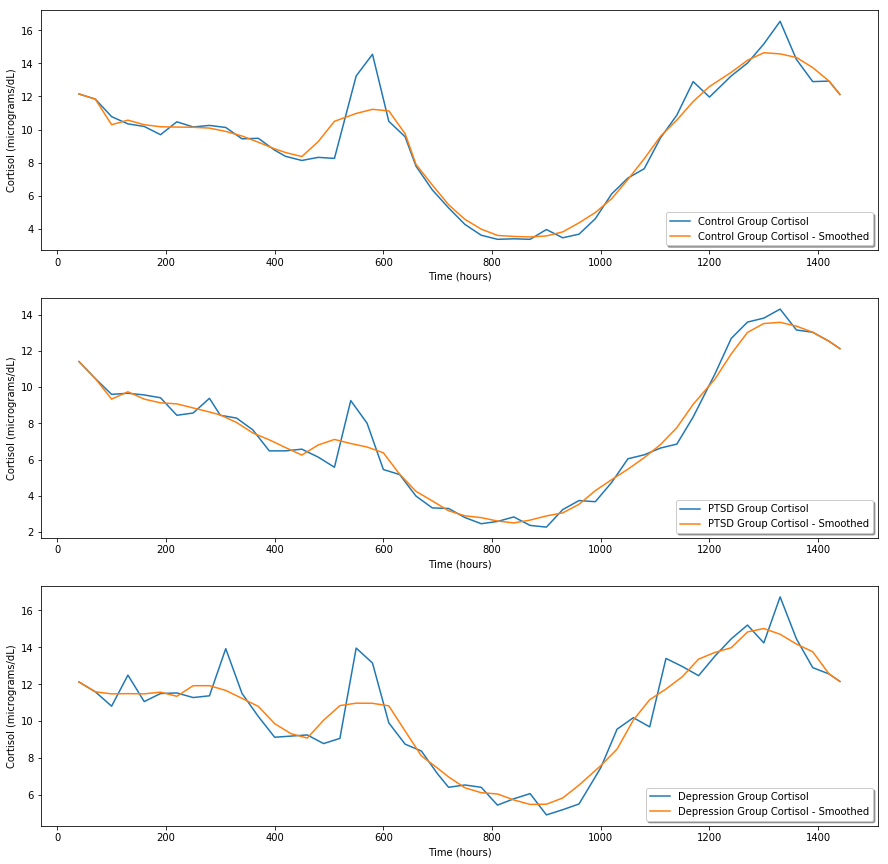

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))

ax1.plot(yehudaControlCortisol[:,0], yehudaControlCortisol[:,1], label = "Control Group Cortisol")
ax1.plot(yehudaControlCortisol_smooth[:,0], yehudaControlCortisol_smooth[:,1], label = "Control Group Cortisol - Smoothed")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(yehudaPTSDCortisol[:,0], yehudaPTSDCortisol[:,1], label = "PTSD Group Cortisol")
ax2.plot(yehudaPTSDCortisol_smooth[:,0], yehudaPTSDCortisol_smooth[:,1], label = "PTSD Group Cortisol - Smoothed")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(yehudaDepressedCortisol[:,0], yehudaDepressedCortisol[:,1], label = "Depression Group Cortisol")
ax3.plot(yehudaDepressedCortisol_smooth[:,0], yehudaDepressedCortisol_smooth[:,1], label = "Depression Group Cortisol - Smoothed")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)


In [51]:
# change the time values of the rearranged sets so that 0 minutes is now 10AM
for i in range(len(carrollControlCortisol)):
    carrollControlCortisol_rearr[i,0] = carrollControlCortisol[i,0]
    carrollControlACTH_rearr[i,0] = carrollControlACTH[i,0]
    carrollHCDepressedCortisol_rearr[i,0] = carrollHCDepressedCortisol[i,0]
    carrollHCDepressedACTH_rearr[i,0] = carrollHCDepressedACTH[i,0]
    carrollLCDepressedCortisol_rearr[i,0] = carrollLCDepressedCortisol[i,0]
    carrollLCDepressedACTH_rearr[i,0] = carrollLCDepressedACTH[i,0]
    
    carrollControlCortisol_rearr_smooth[i,0] = carrollControlCortisol[i,0]
    carrollControlACTH_rearr_smooth[i,0] = carrollControlACTH[i,0]
    carrollHCDepressedCortisol_rearr_smooth[i,0] = carrollHCDepressedCortisol[i,0]
    carrollHCDepressedACTH_rearr_smooth[i,0] = carrollHCDepressedACTH[i,0]
    carrollLCDepressedCortisol_rearr_smooth[i,0] = carrollLCDepressedCortisol[i,0]
    carrollLCDepressedACTH_rearr_smooth[i,0] = carrollLCDepressedACTH[i,0]

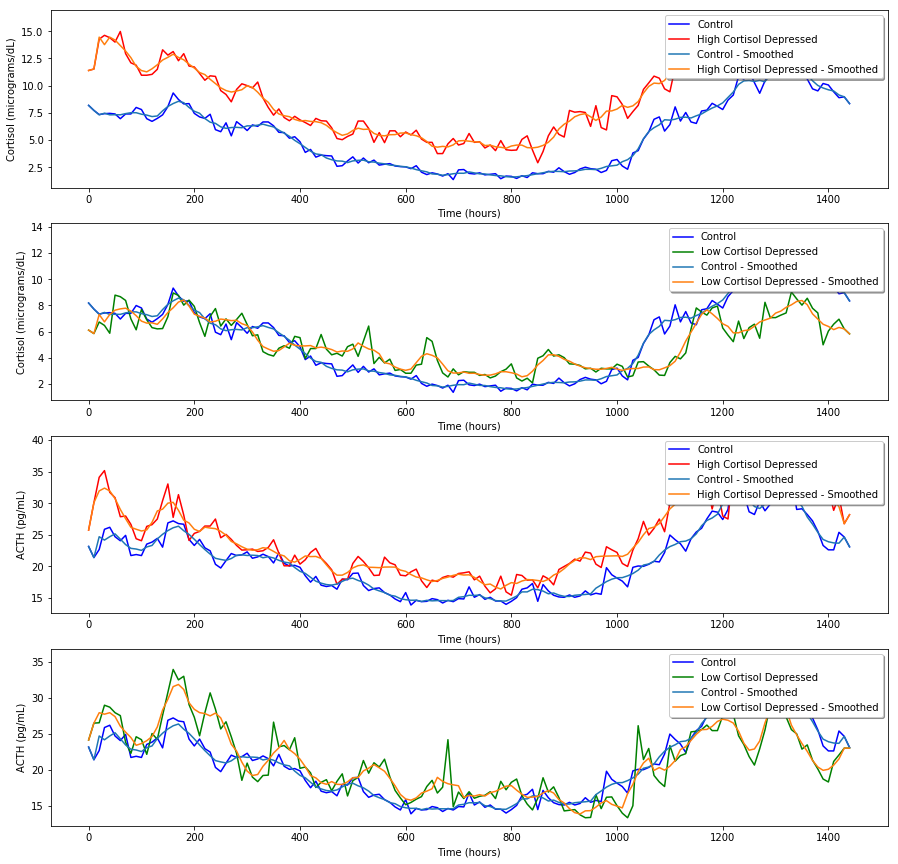

In [52]:
#mpld3.enable_notebook()
%matplotlib inline

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (15,15))

ax1.plot(carrollControlCortisol_rearr[:,0], carrollControlCortisol_rearr[:,1], 'b', label = "Control")
ax1.plot(carrollHCDepressedCortisol_rearr[:,0], carrollHCDepressedCortisol_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax1.plot(carrollControlCortisol_rearr_smooth[:,0], carrollControlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax1.plot(carrollHCDepressedCortisol_rearr_smooth[:,0], carrollHCDepressedCortisol_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax1.legend(loc="upper right", shadow = True, fancybox = True)

ax2.plot(carrollControlCortisol_rearr[:,0], carrollControlCortisol_rearr[:,1], 'b', label = "Control")
ax2.plot(carrollLCDepressedCortisol_rearr[:,0], carrollLCDepressedCortisol_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax2.plot(carrollControlCortisol_rearr_smooth[:,0], carrollControlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax2.plot(carrollLCDepressedCortisol_rearr_smooth[:,0], carrollLCDepressedCortisol_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)

ax3.plot(carrollControlACTH_rearr[:,0], carrollControlACTH_rearr[:,1], 'b', label = "Control")
ax3.plot(carrollHCDepressedACTH_rearr[:,0], carrollHCDepressedACTH_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax3.plot(carrollControlACTH_rearr_smooth[:,0], carrollControlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax3.plot(carrollHCDepressedACTH_rearr_smooth[:,0], carrollHCDepressedACTH_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax3.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax3.legend(loc="upper right", shadow = True, fancybox = True)

ax4.plot(carrollControlACTH_rearr[:,0], carrollControlACTH_rearr[:,1], 'b', label = "Control")
ax4.plot(carrollLCDepressedACTH_rearr[:,0], carrollLCDepressedACTH_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax4.plot(carrollControlACTH_rearr_smooth[:,0], carrollControlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax4.plot(carrollLCDepressedACTH_rearr_smooth[:,0], carrollLCDepressedACTH_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax4.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="upper right", shadow = True, fancybox = True)

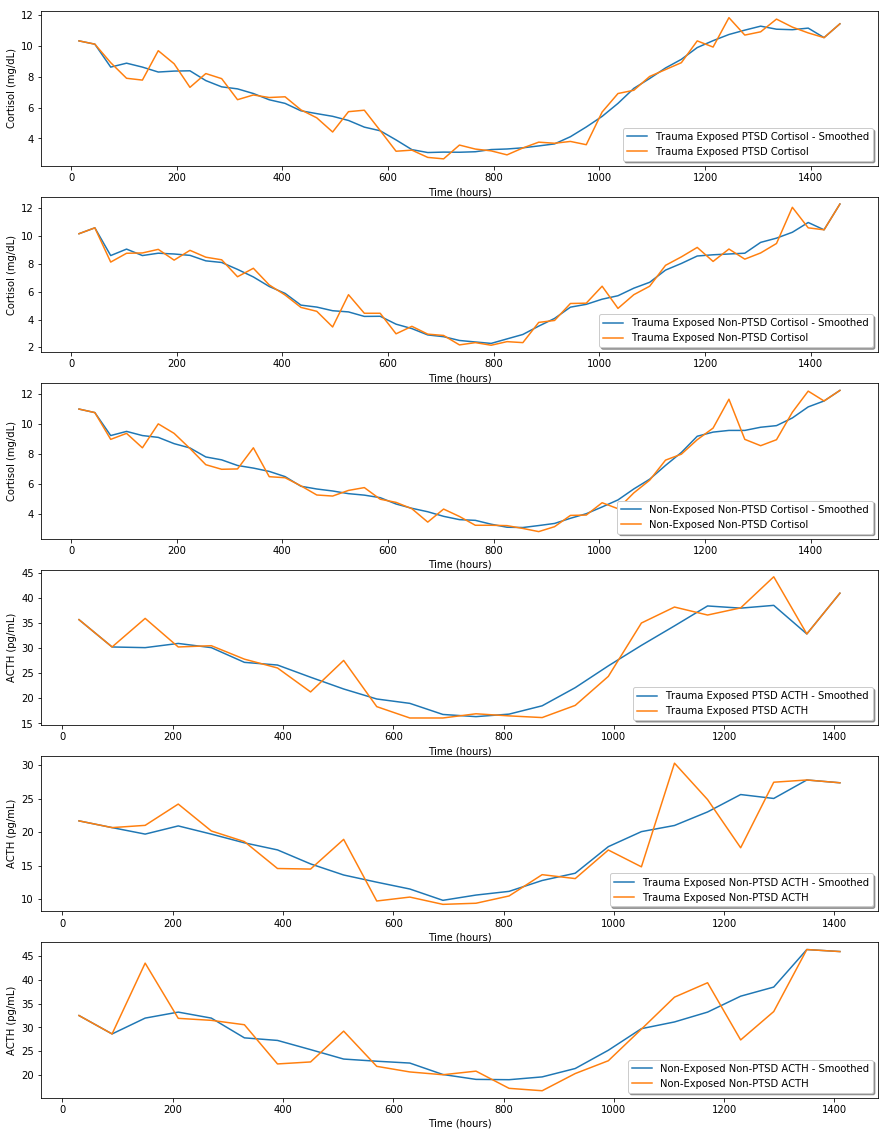

In [53]:
%matplotlib inline

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (15,20))

ax1.plot(golierPTSDCortisol_rearr_smooth[:,0], golierPTSDCortisol_rearr_smooth[:,1], label = "Trauma Exposed PTSD Cortisol - Smoothed")
ax1.plot(golierPTSDCortisol_rearr[:,0], golierPTSDCortisol_rearr[:,1], label = "Trauma Exposed PTSD Cortisol")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(golierNonPTSDTraumaExposedCortisol_rearr_smooth[:,0], golierNonPTSDTraumaExposedCortisol_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD Cortisol - Smoothed")
ax2.plot(golierNonPTSDTraumaExposedCortisol_rearr[:,0], golierNonPTSDTraumaExposedCortisol_rearr[:,1], label = "Trauma Exposed Non-PTSD Cortisol")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(golierNonPTSDNonExposedCortisol_rearr_smooth[:,0], golierNonPTSDNonExposedCortisol_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD Cortisol - Smoothed")
ax3.plot(golierNonPTSDNonExposedCortisol_rearr[:,0], golierNonPTSDNonExposedCortisol_rearr[:,1], label = "Non-Exposed Non-PTSD Cortisol")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)

ax4.plot(golierPTSDACTH_rearr_smooth[:,0], golierPTSDACTH_rearr_smooth[:,1], label = "Trauma Exposed PTSD ACTH - Smoothed")
ax4.plot(golierPTSDACTH_rearr[:,0], golierPTSDACTH_rearr[:,1], label = "Trauma Exposed PTSD ACTH")
ax4.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="lower right", shadow = True, fancybox = True)

ax5.plot(golierNonPTSDTraumaExposedACTH_rearr_smooth[:,0], golierNonPTSDTraumaExposedACTH_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD ACTH - Smoothed")
ax5.plot(golierNonPTSDTraumaExposedACTH_rearr[:,0], golierNonPTSDTraumaExposedACTH_rearr[:,1], label = "Trauma Exposed Non-PTSD ACTH")
ax5.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax5.legend(loc="lower right", shadow = True, fancybox = True)

ax6.plot(golierNonPTSDNonExposedACTH_rearr_smooth[:,0], golierNonPTSDNonExposedACTH_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD ACTH - Smoothed")
ax6.plot(golierNonPTSDNonExposedACTH_rearr[:,0], golierNonPTSDNonExposedACTH_rearr[:,1], label = "Non-Exposed Non-PTSD ACTH")
ax6.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax6.legend(loc="lower right", shadow = True, fancybox = True)


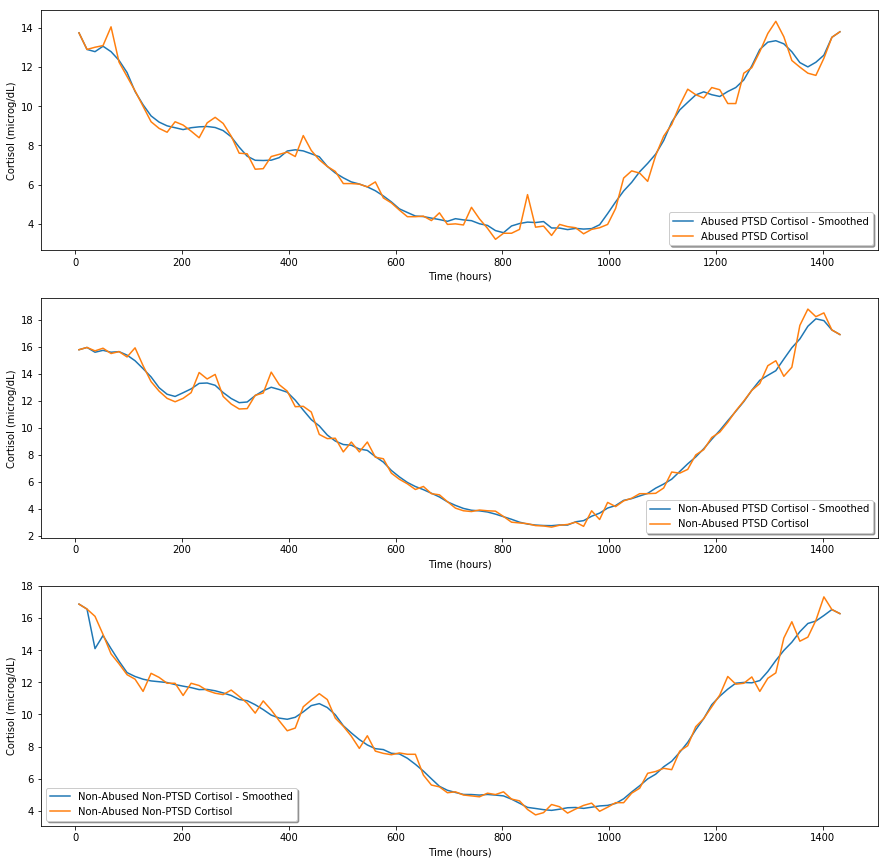

In [54]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))

ax1.plot(bremnerAbusedPTSDCortisol_rearr_smooth[:,0], bremnerAbusedPTSDCortisol_rearr_smooth[:,1], label = "Abused PTSD Cortisol - Smoothed")
ax1.plot(bremnerAbusedPTSDCortisol_rearr[:,0], bremnerAbusedPTSDCortisol_rearr[:,1], label = "Abused PTSD Cortisol")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(bremnerNonAbusedPTSDCortisol_rearr_smooth[:,0], bremnerNonAbusedPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused PTSD Cortisol - Smoothed")
ax2.plot(bremnerNonAbusedPTSDCortisol_rearr[:,0], bremnerNonAbusedPTSDCortisol_rearr[:,1], label = "Non-Abused PTSD Cortisol")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(bremnerNonAbusedNonPTSDCortisol_rearr_smooth[:,0], bremnerNonAbusedNonPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused Non-PTSD Cortisol - Smoothed")
ax3.plot(bremnerNonAbusedNonPTSDCortisol_rearr[:,0], bremnerNonAbusedNonPTSDCortisol_rearr[:,1], label = "Non-Abused Non-PTSD Cortisol")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax3.legend(loc="lower left", shadow = True, fancybox = True)


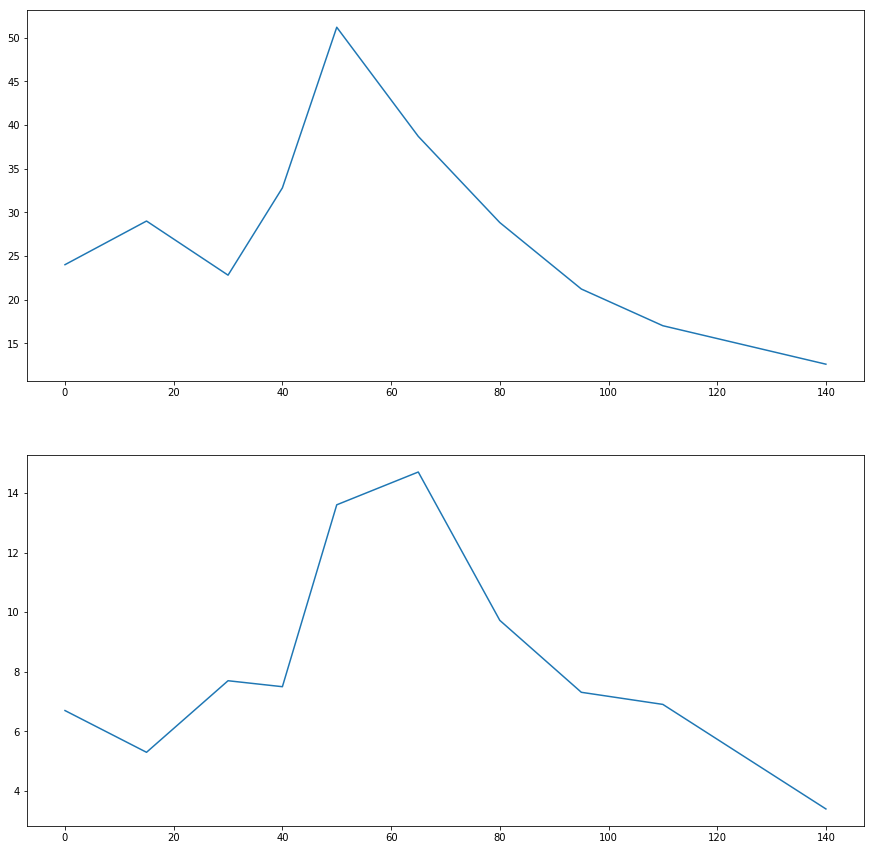

In [55]:
# arrange and graph the Nelson data
nelsonACTH_mean = np.zeros(11)
nelsonCortisol_mean = np.zeros(11)
nelsonACTH = np.zeros((11,60))
nelsonCortisol = np.zeros((11,60))


for i in range(len(nelsonACTH_data[1,:])-1):
    nelsonACTH_mean[i] = np.mean(nelsonACTH_data[:,i+1])
    nelsonCortisol_mean[i] = np.mean(nelsonCortisol_data[:,i+1])

t_nelson = np.array([0, 15, 30, 40, 50, 65, 80, 95, 110, 125, 140])

for i in range(len(t_nelson)):
    nelsonACTH[i,0] = t_nelson[i]
    nelsonACTH[i,1] = nelsonACTH_mean[i]
    
    nelsonCortisol[i,0] = t_nelson[i]
    nelsonCortisol[i,1] = nelsonCortisol_mean[i]
    
for i in range(len(nelsonACTH_data)):
    for j in range(len(t_nelson)):
        nelsonACTH[j,i+2] = nelsonACTH_data[i,j+1]
        nelsonCortisol[j,i+2] = nelsonCortisol_data[i,j+1]
    
    

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15, 15))

ax1.plot(nelsonACTH[:,0], nelsonACTH[:,3])
ax2.plot(nelsonCortisol[:,0], nelsonCortisol[:,3])

## Model Function -- Includes ODE Solver

In [56]:
def model(params, ics):
    # function which represents the circadian rhythm
    def c(t, delta):
        # for some reason, the Decimal object doesn't do modular arithmetic correctly, so it reports a negative number
        # mod 1440 as that negative number plus whatever multiple of 1440
        # so we add 1440 to it until it's positive, then take the mod
        t_m = Decimal(t-delta)
        while t_m < 0:
            t_m += 1440
        t_m = t_m%T
        
        ct = (N_c*((t_m**k/(t_m**k + alpha**k))*((T - t_m)**l/((T - t_m)**l + beta**l)) + eps))
        
        # check if we are getting properly bounded values for c(t)
        if not(0.005217 <= ct <= 1):
            print("C(t) is outside of the reasonable bounds")
        
        return float(ct)
    
    # function containing the system, to be called by solver
    def ode_system(t, y):
        # initialize array to hold ODE function values
        dy = np.zeros(3)
        
        # define parameter values
        [a_0, a_1, a_5, w_1, w_2, w_3, delta] = params
        
        # the ODE system itself
        dy[0] = a_0 + c(t, delta)*(a_1/(1 + a_2*y[2]**2))*(y[0]/(mu + y[0])) - w_1*y[0]
        dy[1] = (a_3*y[0])/(1 + a_4*y[2]) - w_2*y[1]
        dy[2] = a_5*y[1]**2 - w_3*y[2]
        
        return dy
    
    # solve the system with scipy.integrate.ode to see if it's any faster
    solver = sci.ode(ode_system)
    solver.set_integrator('vode', method='bdf', atol=3e-12, rtol=1e-12, nsteps = 100000)
    solver.set_initial_value(ics, t_start)
    
    ts = []
    ys = []
    
    while solver.successful() and solver.t < t_end:
        solver.integrate(solver.t + t_step)
        ts.append(solver.t)
        ys.append(solver.y)

    # solve the system with solve_ivp
    #timeSeries = sci.solve_ivp(ode_system, t, ics, t_eval=np.arange(0,1441,0.01), method='BDF')
    
    # reshape the output frome ode to an array with the times on the first column
    ts = np.reshape(ts, (len(ts),1))
    ys = np.vstack(ys)
    timeSeries = np.hstack((ts, ys))
    return timeSeries

## Cost Function Definition

In [57]:
def cost_fun(params):
    # call the solve function
    simData = model(params, y0)
    
    # this is where Rick makes sure we only have unique values for t, so no time step is repeated
    # I'll include it commented out here, and see if it changes anything later
    #idx = np.unique(simData[:,0], return_index = True)
    #idx = idx[1]
    #simData2 = simData[idx,:]
    #print((simData==simData2).all())
    # I tested whether using numpy.unique was necessary with this code, and it is not
    
    # here, rick performs a cubic interpolation between time steps
    # I could either do this, or just compute the SSE between the raw data and computed data points without doing
    # the interpolation.
    spline_ACTH = interp1d(simData[:,0], simData[:,2], kind = 'linear')
    spline_CORT = interp1d(simData[:,0], simData[:,3], kind = 'linear')
    
    try:
        # compute the actual cost value for the current parameter set by finding SSE between raw data and splines
        # this is where we change the data set we are trying to match, so that it computes the cost based on whatever
        #     data set we put in as the x values into the spline and the y values to subtract
        acthSSE = np.sum((spline_ACTH(nelsonACTH[:,0]) - nelsonACTH[:,1])**2)
        cortSSE = np.sum((spline_CORT(nelsonCortisol[:,0]) - nelsonCortisol[:,1])**2)

        # if i run it with acth data, also, can make cost the average of cortisol and ACTH SSEs
        cost = (acthSSE+cortSSE)/2
        # for now though, cost is just the SSE of cortisol data and simulation
        #cost = cortSSE

        return cost
    except ValueError:
        print("ODE solver did not make through all data points.")
    
    return cost

## Run the Optimization

In [59]:
print(nelsonACTH[0,1], nelsonCortisol[0,1])

20.71677102294828 6.314796551724138


In [60]:
# initial conditions, based on control patient (f) concentrations at midnight
#    had to guess for CRH level, though

y0 = [0, nelsonACTH[0,1], nelsonCortisol[0,1]]

In [61]:
# number of times to run the optimization
n = 5

# define an array to hold the population of parameter vectors
opt_pars = np.zeros((n, len(bounds)+1))

# initialize arrays to save simulation cortisol and ACTH data from each optimization
sims_cort = np.zeros((14002, n))
sims_acth = np.zeros((14002, n))
sims_crh = np.zeros((14002, n))

In [62]:
%%time

# loop n times, running the optimization each time
for i in range(0,n):
    
    print(f"Optimization Run #{i+1}")
    
    # call the differential evolution optimization function on the cost function
    res = sco.differential_evolution(cost_fun, bounds, maxiter = 999, disp = True, popsize = 2)
    
    # alternatively, we can run the SHGO algorithm with the sampling_method = "sobol" flag to do global
    #     optimization with reporting all local minima, as well
    #res = sco.shgo(cost_fun, bounds, callback=callback_fun(*shgo_iter_steps), options = {"f_min": 0.1, "maxiter": None, "minimize_every_iter": True, "local_iter": False, "disp": True}, iters = 3)
    #res = sco.basinhopping(cost_fun, x0, niter = 1000)
    #res = sco.dual_annealing(cost_fun, bounds)
    
    # plug the optimized parameters into the solver
    optimizedSimData = model(res.x, y0)
    print(optimizedSimData.shape)
    
    # save CRH, cortisol and ACTH data into sims arrays
    sims_cort[:,i] = optimizedSimData[:,3]
    sims_acth[:,i] = optimizedSimData[:,2]
    sims_crh[:,i] = optimizedSimData[:,1]
    
    # save the cost function values and optimized parameters for each iteration into the array opt_pars
    opt_pars[i,0] = res.fun
    opt_pars[i,1:] = res.x

Optimization Run #1
differential_evolution step 1: f(x)= 2152.57
differential_evolution step 2: f(x)= 1169.37
differential_evolution step 3: f(x)= 1169.37
differential_evolution step 4: f(x)= 487.61
differential_evolution step 5: f(x)= 487.61
differential_evolution step 6: f(x)= 487.61
differential_evolution step 7: f(x)= 487.61
differential_evolution step 8: f(x)= 487.61
differential_evolution step 9: f(x)= 403.756
differential_evolution step 10: f(x)= 403.756
differential_evolution step 11: f(x)= 403.756
differential_evolution step 12: f(x)= 255.907
differential_evolution step 13: f(x)= 255.907
differential_evolution step 14: f(x)= 255.907
differential_evolution step 15: f(x)= 255.907
differential_evolution step 16: f(x)= 255.907
differential_evolution step 17: f(x)= 213.014
differential_evolution step 18: f(x)= 213.014
differential_evolution step 19: f(x)= 213.014
differential_evolution step 20: f(x)= 201.294
differential_evolution step 21: f(x)= 201.294
differential_evolution step 

differential_evolution step 21: f(x)= 156.24
differential_evolution step 22: f(x)= 156.24
differential_evolution step 23: f(x)= 155.477
differential_evolution step 24: f(x)= 155.319
(14002, 4)
CPU times: user 11min 14s, sys: 13.9 s, total: 11min 28s
Wall time: 11min 36s


## Report the Means +- Standard Deviation for Each Parameter

In [63]:
a_0_mean = np.mean(opt_pars[:,1])
a_1_mean = np.mean(opt_pars[:,2])
a_5_mean = np.mean(opt_pars[:,3])
w_1_mean = np.mean(opt_pars[:,4])
w_2_mean = np.mean(opt_pars[:,5])
w_3_mean = np.mean(opt_pars[:,6])
delta_mean = np.mean(opt_pars[:,7])

In [64]:
a_0_std = np.std(opt_pars[:,1])
a_1_std = np.std(opt_pars[:,2])
a_5_std = np.std(opt_pars[:,3])
w_1_std = np.std(opt_pars[:,4])
w_2_std = np.std(opt_pars[:,5])
w_3_std = np.std(opt_pars[:,6])
delta_std = np.std(opt_pars[:,7])
param_stds = (a_0_std, a_1_std, a_5_std, w_1_std, w_2_std, w_3_std, delta_std)

In [65]:
print(tabulate([["a_0", "%f +- %f" % (a_0_mean, a_0_std)], ["a_1", "%f +- %f" % (a_1_mean, a_1_std)], ["a_5", "%f +- %f" % (a_5_mean, a_5_std)], ["w_1", "%f +- %f" % (w_1_mean, w_1_std)], ["w_2", "%f +- %f" % (w_2_mean, w_2_std)], ["w_3", "%f +- %f" % (w_3_mean, w_3_std)], ["delta", "%f +- %f" % (delta_mean, delta_std)]], headers = ["Parameter", "Mean +- Standard Deviation"]))


Parameter    Mean +- Standard Deviation
-----------  ------------------------------------------
a_0          0.062512 +- 0.046085
a_1          6915694612126.771484 +- 63541125658.800003
a_5          0.002148 +- 0.001553
w_1          0.035717 +- 0.019341
w_2          0.160381 +- 0.173439
w_3          0.191890 +- 0.121630
delta        3017.436565 +- 692.203403


## Save Results to Files

In [66]:
np.savetxt('bangsgaardModel-nelson-patientMeans-opt-pars-5-iterations-expanded-bounds.txt', opt_pars)

In [67]:
np.savetxt('bangsgaardModel-nelson-patientMeans-sims-crh-5-iterations-expanded-bounds.txt', sims_crh)
np.savetxt('bangsgaardModel-nelson-patientMeans-sims-acth-5-iterations-expanded-bounds.txt', sims_acth)
np.savetxt('bangsgaardModel-nelson-patientMeans-sims-cort-5-iterations-expanded-bounds.txt', sims_cort)

In [68]:
np.savetxt('bangsgaardModel-nelson-patientMeans-initial-conditions-5-iterations-expanded-bounds.txt', y0)
np.savetxt('bangsgaardModel-nelson-patientMeans-bounds-5-iterations-expanded-bounds.txt', bounds)

In [69]:
np.savetxt('bangsgaardModel-nelson-patientMeans-param-means-stds-5-iterations-expanded-bounds.txt', [a_0_mean, a_0_std, a_1_mean, a_1_std, a_5_mean, a_5_std, w_1_mean, w_1_std, w_2_mean, w_2_std, w_3_mean, w_3_std, delta_mean, delta_std])

## Graph the Obtained Data

[Text(0, 0.5, 'Cortisol (micrograms/dL)'),
 Text(0.5, 0, 'Time (h)'),
 Text(0.5, 1.0, 'Cortisol Concentrations')]

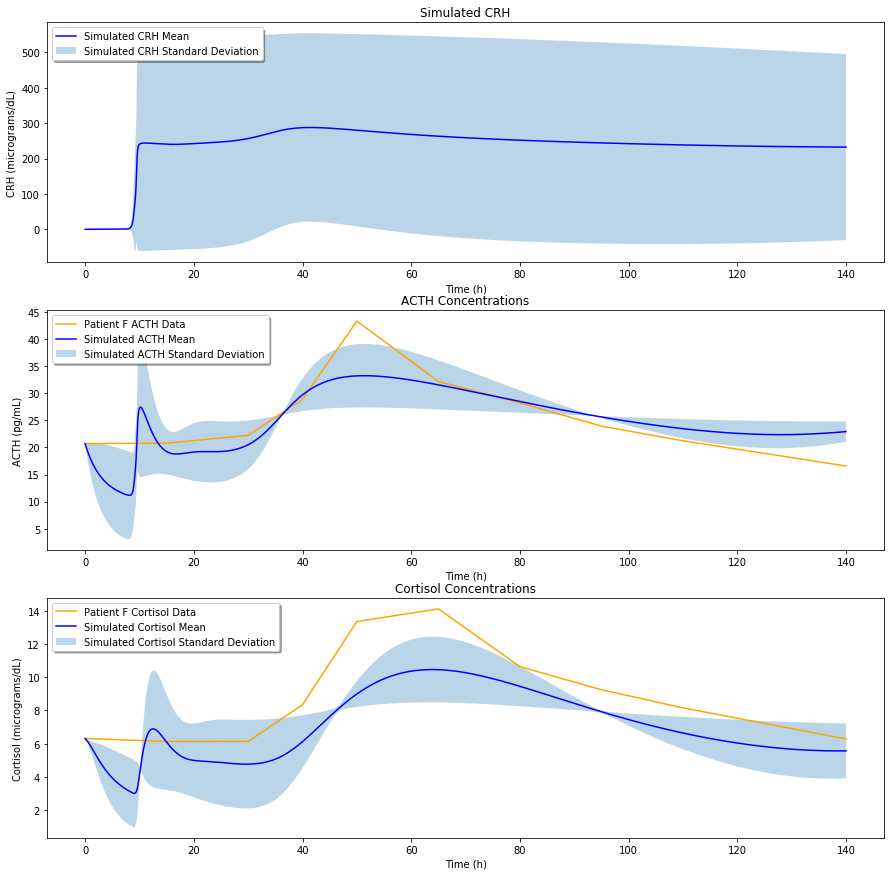

In [70]:
# graphing code for Nelson data

%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15, 15))

ax1.plot(optimizedSimData[:,0], np.mean(sims_crh, axis = 1), label = "Simulated CRH Mean", color = "blue")
ax1.fill_between(optimizedSimData[:,0], np.mean(sims_crh, axis = 1) - np.std(sims_crh, axis = 1), np.mean(sims_crh, axis = 1) + np.std(sims_crh, axis = 1), alpha = 0.3, label = "Simulated CRH Standard Deviation")
ax1.legend(loc = "upper left", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "CRH (micrograms/dL)", title = "Simulated CRH")

ax2.plot(nelsonACTH[:,0], nelsonACTH[:,1], label = "Patient F ACTH Data", color = "orange")
ax2.plot(optimizedSimData[:,0], np.mean(sims_acth, axis = 1), label = "Simulated ACTH Mean", color = "blue")
ax2.fill_between(optimizedSimData[:,0], np.mean(sims_acth, axis = 1) - np.std(sims_acth, axis = 1), np.mean(sims_acth, axis = 1) + np.std(sims_acth, axis = 1), alpha = 0.3, label = "Simulated ACTH Standard Deviation")
ax2.legend(loc = "upper left", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentrations")

ax3.plot(nelsonCortisol[:,0], nelsonCortisol[:,1], label = "Patient F Cortisol Data", color = "orange")
ax3.plot(optimizedSimData[:,0], np.mean(sims_cort, axis = 1), label = "Simulated Cortisol Mean", color = "blue")
ax3.fill_between(optimizedSimData[:,0], np.mean(sims_cort, axis = 1) - np.std(sims_cort, axis = 1), np.mean(sims_cort, axis = 1) + np.std(sims_cort, axis = 1), alpha = 0.3, label = "Simulated Cortisol Standard Deviation")
ax3.legend(loc = "upper left", shadow = True, fancybox = True)
ax3.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentrations")

# include the value of the cost function for this set of graphs at the bottom of the figure
#txt = "cost = [260.952, 1016.62]"
#plt.figtext(0.1, 0.09, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
#plt.savefig("../Images/Bangsgaard Model Figures/bangsgaardModel-nelson-patientMeans-5-iterations-expanded-bounds.png", dpi = 300)


## No Optimization Run

In [110]:
print(patientFacth[0,1], patientFcortisol[0,1])

8.725314 1.158798


In [158]:
y0 = [2,8.725314,1.158798]

In [159]:
data_no_opt = model(authors_params, y0)

### Plot the No-Optimization Simulation Along With Raw Data

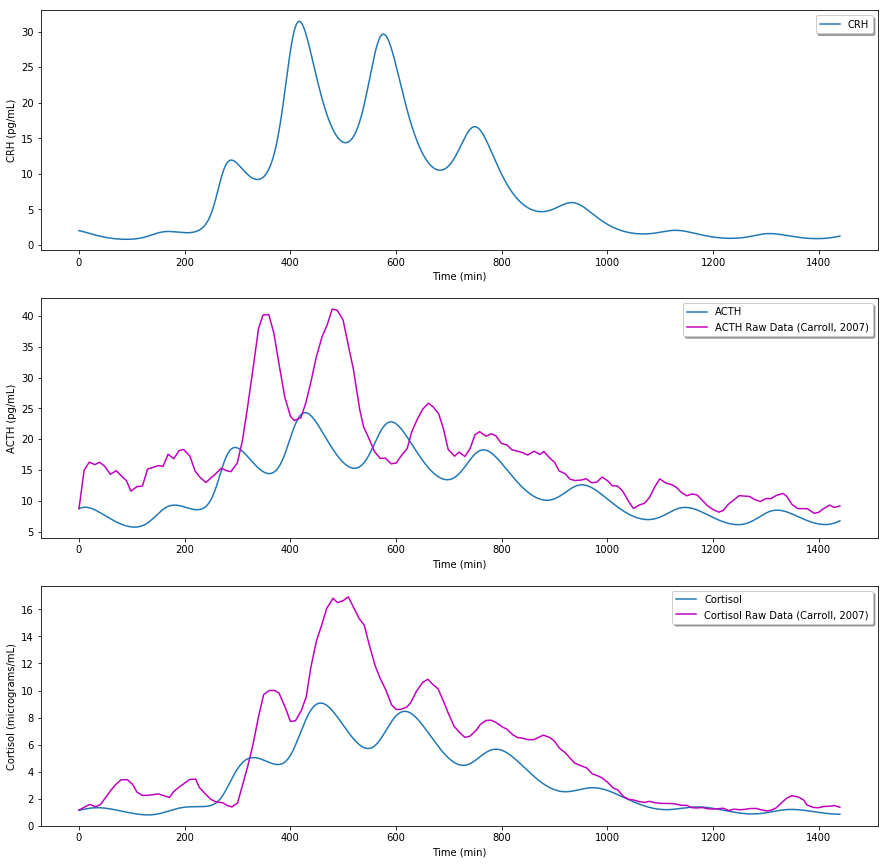

In [160]:
%matplotlib inline

#mpld3.enable_notebook()

# I want to graph the following:
#     - Average Cortisol, ACTH and CRH values over 24h period between all parameter sets for each data set
#     - Shaded area for mean +- standard deviation for each parameter for each data set
#     - Plot the raw data values on each plot for comparison

fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(15,15))
ax1.plot(data_no_opt[:,0], data_no_opt[:,1], label = "CRH")
ax1.set(xlabel = "Time (min)", ylabel = "CRH (pg/mL)")
ax1.legend(loc="upper right", shadow = True, fancybox = True)
ax2.plot(data_no_opt[:,0], data_no_opt[:,2], label = "ACTH")
ax2.plot(patientFacth[:,0], patientFacth_smooth[:,1], 'm', label = "ACTH Raw Data (Carroll, 2007)")
ax2.set(xlabel = "Time (min)", ylabel = "ACTH (pg/mL)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)
ax3.plot(data_no_opt[:,0], data_no_opt[:,3], label = "Cortisol")
ax3.plot(patientFcortisol[:,0], patientFcortisol_smooth[:,1], 'm', label = "Cortisol Raw Data (Carroll, 2007)")
ax3.set(xlabel = "Time (min)", ylabel = "Cortisol (micrograms/mL)")
ax3.legend(loc="upper right", shadow = True, fancybox = True)

## No Optimization Run--Iterate Over Multiple CRH Initial Conditions

In [227]:
# loop through initial conditions for CRH to see how the graph changes
CRH_vals = np.arange(9, 11, 0.1)
IC_array = np.zeros((len(CRH_vals), 3))

for index, item in enumerate(CRH_vals):
    IC_array[index, 0] = item
    IC_array[index, 1] = 8.725314
    IC_array[index, 2] = 1.158798

In [228]:
no_opt = np.zeros((len(CRH_vals), 144003, 4))

In [229]:
for index, item in enumerate(IC_array):
    print("Run #", index)
    no_opt[index, :, :] = model(authors_params, item)

Run # 0
Run # 1
Run # 2
Run # 3
Run # 4
Run # 5
Run # 6
Run # 7
Run # 8
Run # 9
Run # 10
Run # 11
Run # 12
Run # 13
Run # 14
Run # 15
Run # 16
Run # 17
Run # 18
Run # 19


In [230]:
CRH_labels = []
ACTH_labels = []
Cortisol_labels = []

for index, item in enumerate(IC_array):
    CRH_labels.append("CRH Simulation #" + str(index) + ": CRH = " + str(item[0]))
    ACTH_labels.append("ACTH Simulation #" + str(index) + ": ACTH = " + str(item[1]))                  
    Cortisol_labels.append("Cortisol Simulation #" + str(index) + ": Cortisol = " + str(item[2]))

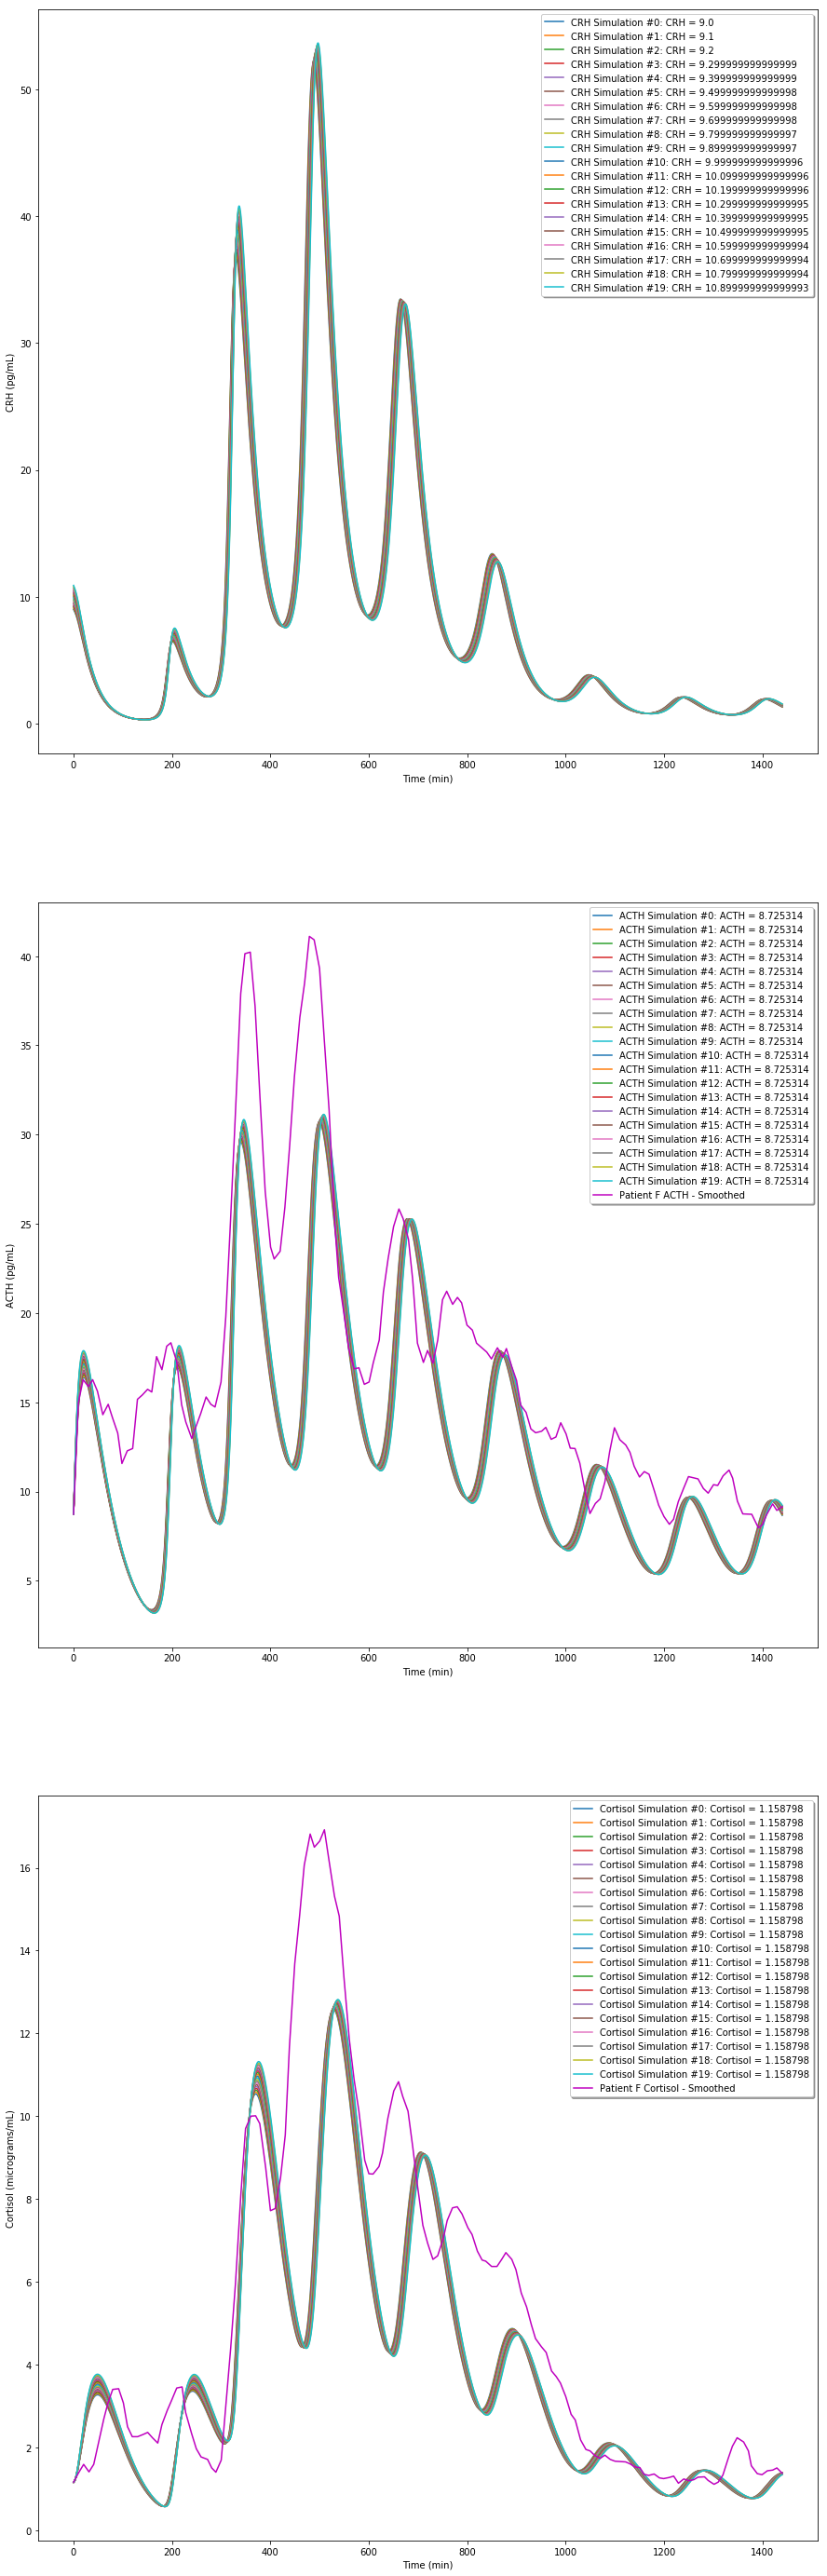

In [231]:
%matplotlib inline

# plot the simulations together to see how increasing initial CRH value
# changes behavior

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15, 50))

for index, item in enumerate(no_opt):
    ax1.plot(item[:,0], item[:,1], label = CRH_labels[index])
    ax2.plot(item[:,0], item[:,2], label = ACTH_labels[index])
    ax3.plot(item[:,0], item[:,3], label = Cortisol_labels[index])

ax1.set(xlabel = "Time (min)", ylabel = "CRH (pg/mL)")
ax1.legend(loc="upper right", shadow = True, fancybox = True)

ax2.plot(patientFacth[:,0], patientFacth_smooth[:,1], 'm', label = "Patient F ACTH - Smoothed")
ax2.set(xlabel = "Time (min)", ylabel = "ACTH (pg/mL)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)

ax3.plot(patientFcortisol[:,0], patientFcortisol_smooth[:,1], 'm', label = "Patient F Cortisol - Smoothed")
ax3.set(xlabel = "Time (min)", ylabel = "Cortisol (micrograms/mL)")
ax3.legend(loc="upper right", shadow = True, fancybox = True)